In [330]:
import nltk

nltk.download("inaugural")
from nltk.corpus import inaugural

TARGET_PRESIDENT = "Bush"
NON_TARGET_PRESIDENT = "Harrison"

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [331]:
presidents = set([fileid[5:-4] for fileid in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [inaugural.sents(file_id) for file_id in inaugural.fileids() if president in file_id]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sorted_dict: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sorted_dict.items()):
    print(f"{idx}: {president_item[0]} - {president_item[1]}")

0: Harrison - 367
1: Bush - 337
2: Roosevelt - 308
3: Reagan - 253
4: Monroe - 251
5: McKinley - 230
6: Eisenhower - 215
7: Obama - 204
8: Coolidge - 197
9: Clinton - 193
10: Nixon - 175
11: Biden - 170
12: Lincoln - 165
13: Taft - 159
14: Hoover - 158
15: Polk - 153
16: Harding - 149
17: Wilson - 128
18: Truman - 116
19: Garfield - 112
20: Adams - 111
21: Pierce - 104
22: Cleveland - 102
23: VanBuren - 95
24: Johnson - 94
25: Trump - 90
26: Buchanan - 89
27: Jefferson - 87
28: Grant - 85
29: Hayes - 59
30: Jackson - 55
31: Madison - 54
32: Carter - 53
33: Kennedy - 52
34: Washington - 28
35: Taylor - 22


In [332]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

nontarget_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if NON_TARGET_PRESIDENT in file_id
]
target_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if TARGET_PRESIDENT in file_id
]

nontarget_sents = [sent for speech in nontarget_speeches for sent in speech]
target_sents = [sent for speech in target_speeches for sent in speech]

print("Non-terget speeches: ", len(nontarget_sents))
for sent in nontarget_sents:
    print(" ".join(sent))

Non-terget speeches:  367
Called from a retirement which I had supposed was to continue for the residue of my life to fill the chief executive office of this great and free nation , I appear before you , fellow - citizens , to take the oaths which the Constitution prescribes as a necessary qualification for the performance of its duties ; and in obedience to a custom coeval with our Government and what I believe to be your expectations I proceed to present to you a summary of the principles which will govern me in the discharge of the duties which I shall be called upon to perform .
It was the remark of a Roman consul in an early period of that celebrated Republic that a most striking contrast was observable in the conduct of candidates for offices of power and trust before and after obtaining them , they seldom carrying out in the latter case the pledges and promises made in the former .
However much the world may have improved in many respects in the lapse of upward of two thousand y

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [333]:
print("Target speeches: ", len(target_sents))
for sent in target_sents:
    print(" ".join(sent))


Target speeches:  337
Mr . Chief Justice , Mr . President , Vice President Quayle , Senator Mitchell , Speaker Wright , Senator Dole , Congressman Michael , and fellow citizens , neighbors , and friends :
There is a man here who has earned a lasting place in our hearts and in our history .
President Reagan , on behalf of our Nation , I thank you for the wonderful things that you have done for America .
I have just repeated word for word the oath taken by George Washington 200 years ago , and the Bible on which I placed my hand is the Bible on which he placed his .
It is right that the memory of Washington be with us today , not only because this is our Bicentennial Inauguration , but because Washington remains the Father of our Country .
And he would , I think , be gladdened by this day ; for today is the concrete expression of a stunning fact : our continuity these 200 years since our government began .
We meet on democracy ' s front porch , a good place to talk as neighbors and as fr

In [334]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for sent in nontarget_sents + target_sents:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)


{'PRP$', 'VBN', 'VBZ', 'NN', 'NNS', 'VBP', 'WP', 'JJ', 'VBD', 'IN', 'WP$', 'PRP', 'DT', 'POS', ',', 'UH', 'RBS', 'CD', 'PDT', 'NNPS', 'WDT', 'RB', 'WRB', 'MD', '(', 'RBR', 'TO', 'CC', ')', 'NNP', '.', 'JJS', 'RP', "''", 'JJR', 'VBG', ':', 'VB', 'EX'}


In [335]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator()
data = []
correctness = []

for b_sent in nontarget_sents:
    x, y = dg.generate_dataset(b_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_sent in target_sents:
    x, y = dg.generate_dataset(b_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

columns = list(all_tags) + [
    "Word variation",
    "Uncommon_word_frequency",
    "sentence_length",
]

df = pd.DataFrame(data, columns=columns)
nd_correctness = np.array(correctness)

display(df.head(10))


,PRP$,VBN,VBZ,NN,NNS,VBP,WP,JJ,VBD,IN,...,RP,'',JJR,VBG,:,VB,EX,Word variation,Uncommon_word_frequency,sentence_length
0,0.009434,0.009434,0.000000,0.009434,0.009434,0.009434,0.009434,0.009434,0.009434,0.009434,...,0.000000,0.0,0.0,0.000000,0.009434,0.009434,0.000000,0.650943,0.490566,106
1,0.000000,0.017544,0.000000,0.017544,0.017544,0.017544,0.000000,0.017544,0.017544,0.017544,...,0.017544,0.0,0.0,0.017544,0.000000,0.000000,0.000000,0.736842,0.473684,57
2,0.000000,0.018182,0.000000,0.018182,0.018182,0.018182,0.000000,0.018182,0.018182,0.018182,...,0.000000,0.0,0.0,0.000000,0.000000,0.018182,0.000000,0.800000,0.618182,55
3,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.000000,0.010204,...,0.010204,0.0,0.0,0.010204,0.010204,0.010204,0.010204,0.724490,0.500000,98
4,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.071429,...,0.000000,0.0,0.0,0.000000,0.000000,0.071429,0.000000,1.000000,0.500000,14
5,0.018182,0.018182,0.000000,0.018182,0.018182,0.000000,0.018182,0.018182,0.018182,0.018182,...,0.000000,0.0,0.0,0.000000,0.000000,0.018182,0.000000,0.836364,0.527273,55
6,0.043478,0.010870,0.021739,0.010870,0.010870,0.000000,0.000000,0.010870,0.010870,0.010870,...,0.000000,0.0,0.0,0.010870,0.000000,0.010870,0.000000,0.695652,0.510870,92
7,0.020408,0.020408,0.020408,0.020408,0.020408,0.000000,0.000000,0.020408,0.000000,0.020408,...,0.000000,0.0,0.0,0.020408,0.040816,0.020408,0.000000,0.755102,0.510204,49
8,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.000000,0.026316,...,0.000000,0.0,0.0,0.026316,0.000000,0.026316,0.000000,0.815789,0.500000,38
9,0.020833,0.020833,0.000000,0.020833,0.020833,0.020833,0.000000,0.020833,0.020833,0.041667,...,0.000000,0.0,0.0,0.000000,0.000000,0.020833,0.000000,0.833333,0.520833,48


In [336]:
print(df.dtypes)


PRP$                       float64
VBN                        float64
VBZ                        float64
NN                         float64
NNS                        float64
VBP                        float64
WP                         float64
JJ                         float64
VBD                        float64
IN                         float64
WP$                        float64
PRP                        float64
DT                         float64
POS                        float64
,                          float64
UH                         float64
RBS                        float64
CD                         float64
PDT                        float64
NNPS                       float64
WDT                        float64
RB                         float64
WRB                        float64
MD                         float64
(                          float64
RBR                        float64
TO                         float64
CC                         float64
)                   

In [337]:
print(df.isna().sum())

PRP$                       0
VBN                        0
VBZ                        0
NN                         0
NNS                        0
VBP                        0
WP                         0
JJ                         0
VBD                        0
IN                         0
WP$                        0
PRP                        0
DT                         0
POS                        0
,                          0
UH                         0
RBS                        0
CD                         0
PDT                        0
NNPS                       0
WDT                        0
RB                         0
WRB                        0
MD                         0
(                          0
RBR                        0
TO                         0
CC                         0
)                          0
NNP                        0
.                          0
JJS                        0
RP                         0
''                         0
JJR           

In [338]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")


auc-rocスコア: 0.8136621900826446


In [339]:
display(pd.crosstab(y_test, y_pred))


col_0,False,True
row_0,,
False,69,19
True,30,58


In [340]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


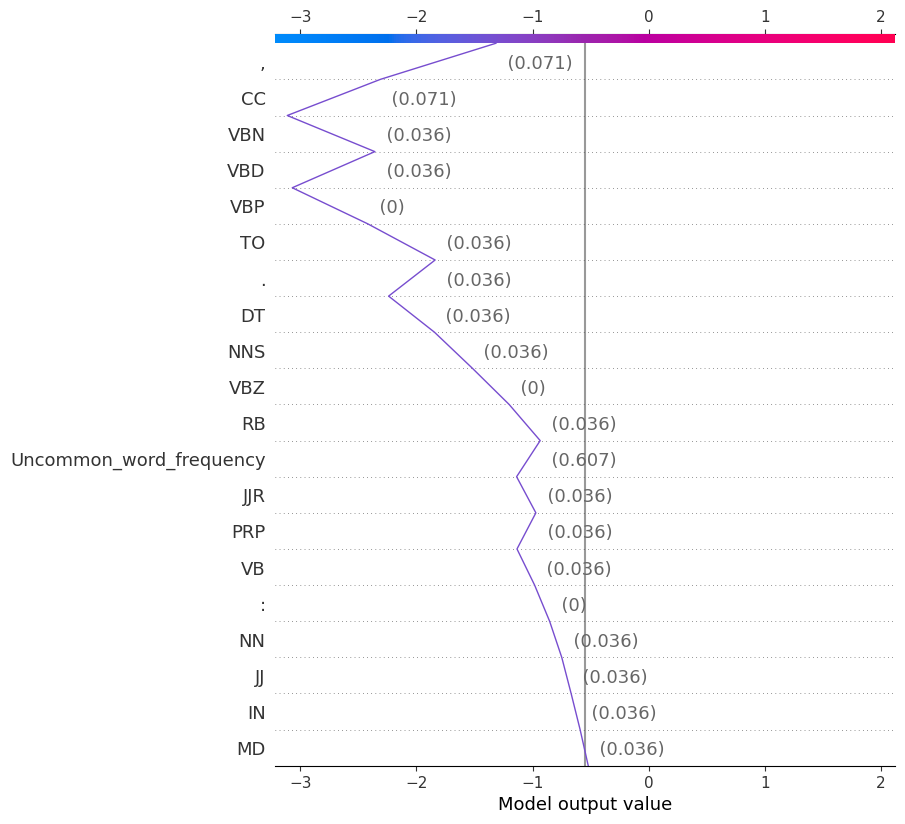

In [341]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


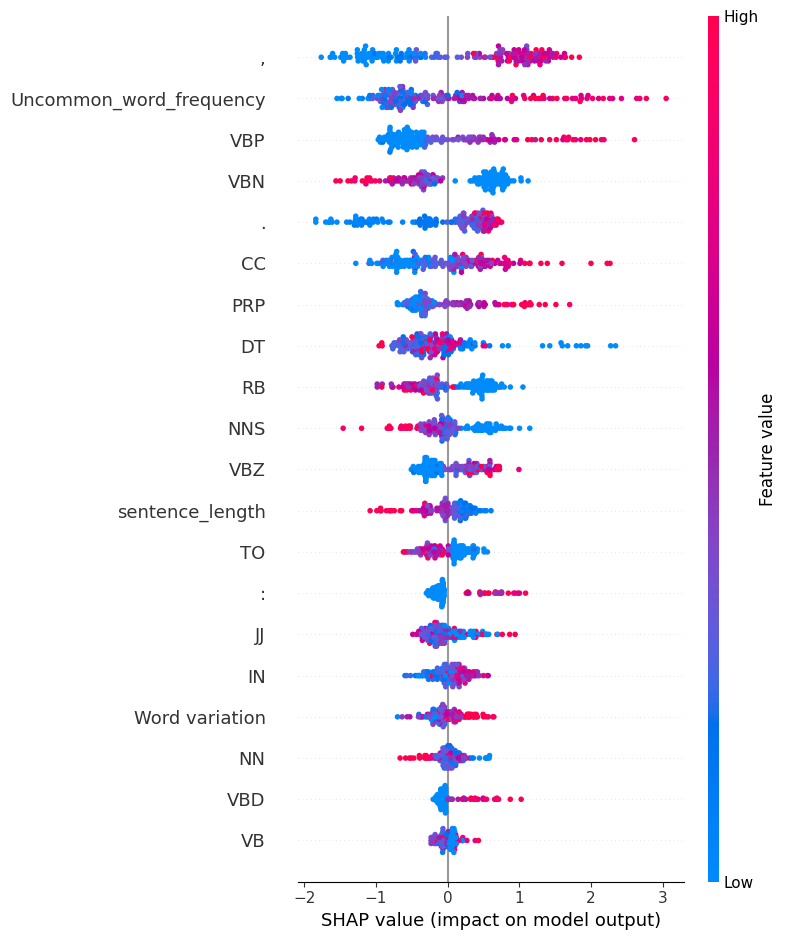

In [342]:
shap.summary_plot(sv_test, X_test)


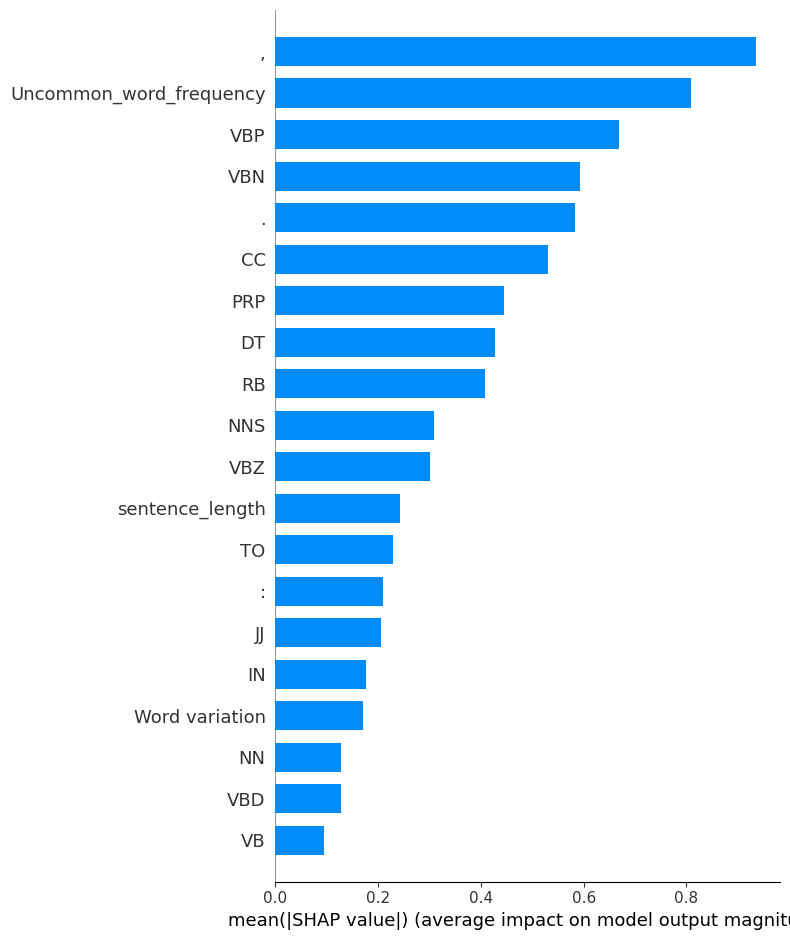

In [343]:
shap.summary_plot(sv_test, X_test, plot_type="bar")
